In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import openai
import os
from llmlex.kanlex import KANLEX
import llmlex

In [2]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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",
)
llmlex.llm.check_key_limit(client)

73.11815195000003

# Example 1

In [3]:
def multivariate_function(x):
    return torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)

# Initialize a KANSR instance for the multivariate function
multivariate_kansr = KANLEX(
    client=client,
    width=[2, 3, 1],
    grid=7,
    k=3,
    seed=0
)

multivariate_dataset = multivariate_kansr.create_dataset(
    f=multivariate_function,
    ranges=(-1, 1),
    n_var=2,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 13:41:42,333 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.71e-03 | test_loss: 1.71e-03 | reg: 1.18e+01 | : 100%|█| 50/50 [00:10<00:00,  4.65it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 13:41:53,626 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 13:41:53,634 - LLMLEx.kanLEx - INFO - Pruned model:
2025-04-12 13:41:53,806 - LLMLEx.kanLEx - INFO - Final train loss: 0.0017132654320448637


saving model version 0.2


0.0017132654320448637

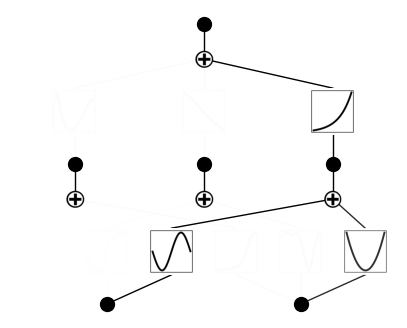

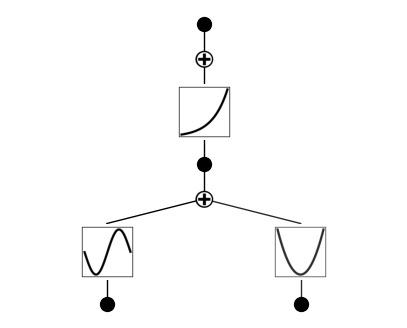

In [4]:
multivariate_kansr.train_kan(
    dataset=multivariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

2025-04-12 13:41:54,319 - LLMLEx.kanLEx - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-04-12 13:41:54,320 - LLMLEx.kanLEx - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-04-12 13:41:54,439 - llmlex.llmlex - INFO - Processing KAN model connections
2025-04-12 13:41:54,441 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,0,0)


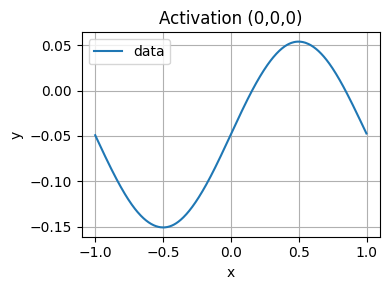

2025-04-12 13:41:54,539 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,0,0)
2025-04-12 13:41:54,768 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -0.9965788722038269, for constant: [-0.04952487]
2025-04-12 13:41:54,768 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:41:57,360 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 13:41:57,361 - llmlex.llmlex - INFO - Initial population best: score=-1.2292530300328508e-06, params=[-1.02229130e-01 -3.14643995e+00  7.01311651e-04 -4.84811370e-02], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x + params[3]...
2025-04-12 13:41:57,362 - llmlex.llmlex - INFO - Exit condition met after initial population
2025-04-12 13:41:57,362 - llmlex.llmlex - INFO - Successfully found expression for connection (0,0,0)



API Call Statistics:
  Successful calls (end-to-end): 3
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 3 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 3 succeeded, 0 failed (100.00% success)
  Function Conversion: 3 succeeded, 0 failed (100.00% success)
  Curve Fitting: 3 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,0): params[0] * np.sin(params[1] * x) + params[2] * x + params[3], with score -1.2292530300328508e-06 and parameters [-1.020e-01 -3.146e+00  1.000e-03 -4.800e-02]


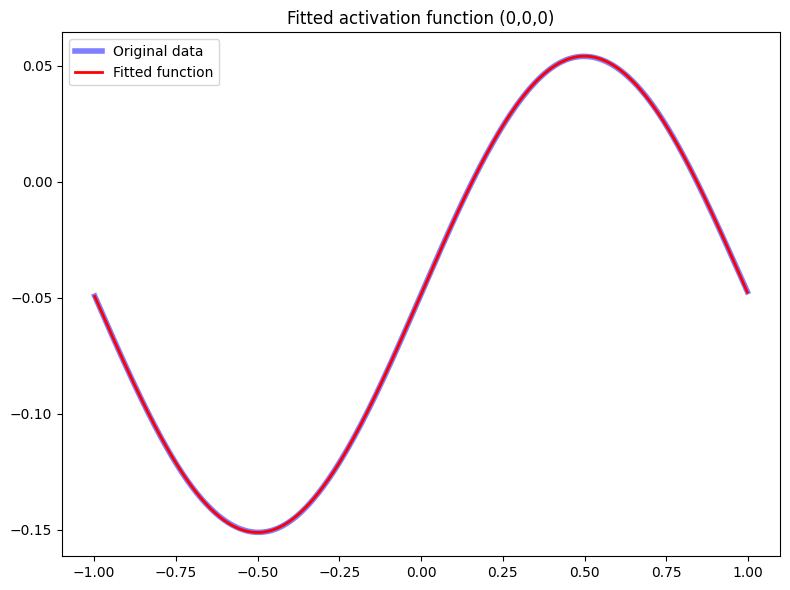

2025-04-12 13:41:57,464 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,1,0)


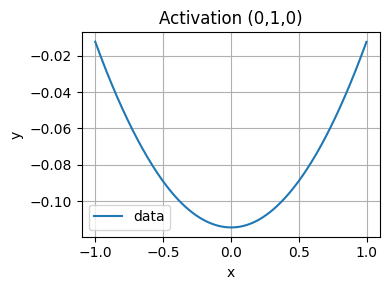

2025-04-12 13:41:57,527 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,1,0)
2025-04-12 13:41:57,529 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.8307503461837769, for constant: [-0.07957751]
2025-04-12 13:41:57,529 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:41:59,414 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 13:41:59,415 - llmlex.llmlex - INFO - Initial population best: score=-3.6295352856541285e-06, params=[ 1.02361369e-01  3.62543723e-05 -1.14576013e-01], ansatz: params[0] * x**2 + params[1] * x + params[2]...
2025-04-12 13:41:59,416 - llmlex.llmlex - INFO - Exit condition met after initial population
2025-04-12 13:41:59,417 - llmlex.llmlex - INFO - Successfully found expression for connection (0,1,0)



API Call Statistics:
  Successful calls (end-to-end): 3
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 3 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 3 succeeded, 0 failed (100.00% success)
  Function Conversion: 3 succeeded, 0 failed (100.00% success)
  Curve Fitting: 3 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,1,0): params[0] * x**2 + params[1] * x + params[2], with score -3.6295352856541285e-06 and parameters [ 0.102  0.    -0.115]


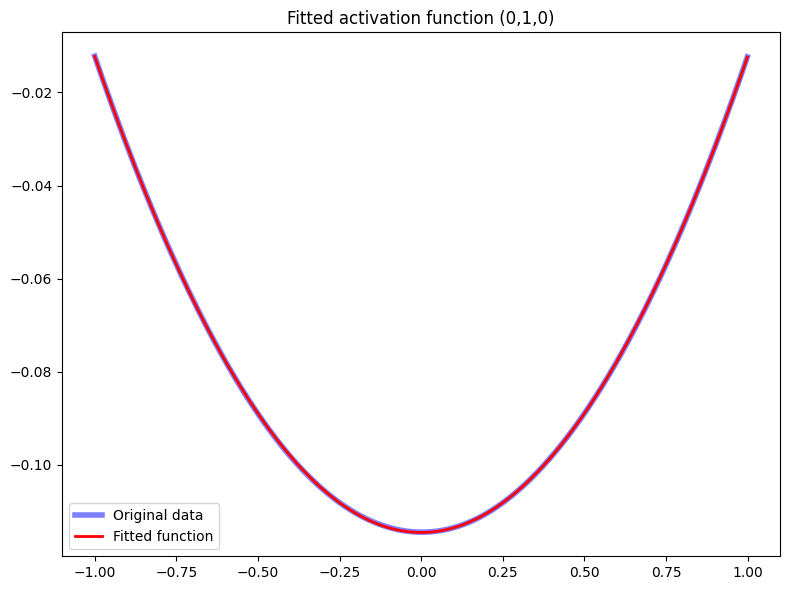

2025-04-12 13:41:59,522 - llmlex.llmlex - INFO - Processing non-symbolic activation function (1,0,0)


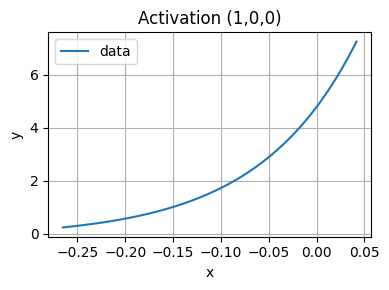

2025-04-12 13:41:59,588 - llmlex.llmlex - INFO - Running genetic algorithm for connection (1,0,0)
2025-04-12 13:41:59,589 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -3.047534704208374, for constant: [1.71331981]
2025-04-12 13:41:59,589 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:42:01,534 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 13:42:01,535 - llmlex.llmlex - INFO - Initial population best: score=-0.002142505021765828, params=[ 4.79627826 10.39422849], ansatz: params[0] * np.exp(params[1] * x)...


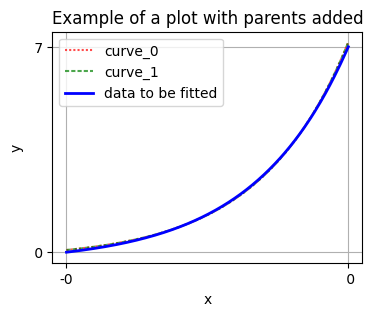

2025-04-12 13:42:01,612 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 13:42:02,766 - llmlex.llmlex - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't assist with this request.'
2025-04-12 13:42:04,463 - llmlex.llmlex - INFO - Generation 1 best: score=-7.979143265401945e-05, params=[ 4.77858383 10.13032367 -1.58221727], ansatz: params[0] * np.exp(params[1] * x) + params[2] * x**2...
2025-04-12 13:42:04,464 - llmlex.llmlex - INFO - Exit condition met after generation 1: -7.979143265401945e-05>-0.001
2025-04-12 13:42:04,465 - llmlex.llmlex - INFO - Successfully found expression for connection (1,0,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 1
  Success rate: 85.71%

Breakdown by processing stage:
  Api Call: 7 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 1 failed (85.71% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - llm refusal: 1
Approximation for (1,0,0): params[0] * np.exp(params[1] * x) + params[2] * x**2, with score -7.979143265401945e-05 and parameters [ 4.779 10.13  -1.582]


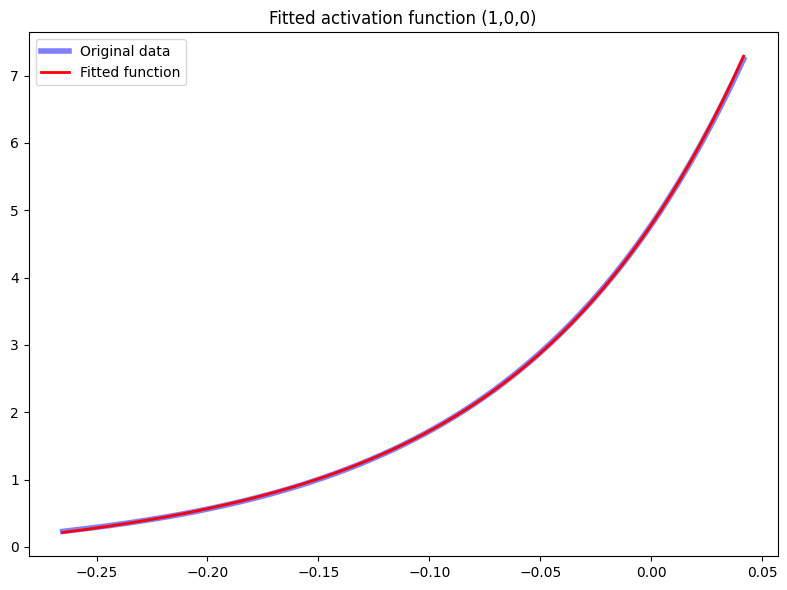

2025-04-12 13:42:04,573 - llmlex.llmlex - INFO - KAN conversion complete: 3 total connections
2025-04-12 13:42:04,573 - llmlex.llmlex - INFO - Connection breakdown: 0 symbolic, 0 zero, 3 processed
2025-04-12 13:42:04,759 - llmlex.llmlex - INFO - API key usage whilst this kan_to_symbolic was running: $0.00
2025-04-12 13:42:04,760 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 0): params[0] * np.sin(params[1] * x) + params[2] * x + params[3], has parameters [-0.1 -3.1  0.  -0. ]
2025-04-12 13:42:04,761 - LLMLEx.kanLEx - INFO - Approximation for (0, 1, 0): params[0] * x**2 + params[1] * x + params[2], has parameters [ 0.1  0.  -0.1]
2025-04-12 13:42:04,762 - LLMLEx.kanLEx - INFO - Approximation for (1, 0, 0): params[0] * np.exp(params[1] * x) + params[2] * x**2, has parameters [ 4.8 10.1 -1.6]
2025-04-12 13:42:04,762 - LLMLEx.kanLEx - INFO - Building expression tree
2025-04-12 13:42:04,763 - LLMLEx.kanLEx - INFO - KAN Connection: (0, 0, 0), Best Expression: -0.1022291302542226 * np.sin

In [5]:
best_expressions, best_chi_squareds, results_dicts, results_all_dicts = multivariate_kansr.get_symbolic(
    client=client,
    population=3,
    generations=2,
    temperature=0.1,
    gpt_model="openai/gpt-4o",
    verbose=1,
    use_async=True,
    plot_fit=True,
    plot_parents=True,
    demonstrate_parent_plotting=True
)

In [6]:
best_expressions

['np.exp(-2.98635458946228*x0**3 + 2.72452855110168*x0 + x1**2)']

# Example 2

In [7]:
def multivariate_function(x):
    return x[:,[0]] * x[:,[1]]

# Initialize a KANSR instance for the multivariate function
multivariate_kansr = KANLEX(
    client=client,
    width=[2, 1, 1],
    grid=7,
    k=3,
    seed=0
)

multivariate_dataset = multivariate_kansr.create_dataset(
    f=multivariate_function,
    ranges=(1, 2),
    n_var=2,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 13:42:23,679 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 7.40e-06 | test_loss: 6.99e-06 | reg: 7.52e+00 | : 100%|█| 50/50 [00:05<00:00,  9.91it
2025-04-12 13:42:28,910 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 13:42:28,918 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.1
Unpruned model. Pruning? True
saving model version 0.2


2025-04-12 13:42:29,092 - LLMLEx.kanLEx - INFO - Final train loss: 7.401979019050486e-06


7.401979019050486e-06

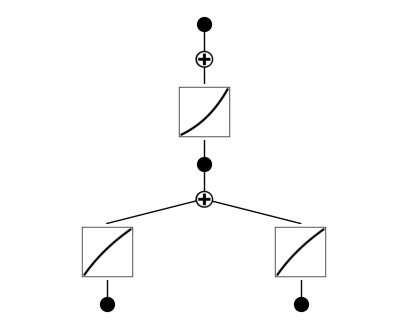

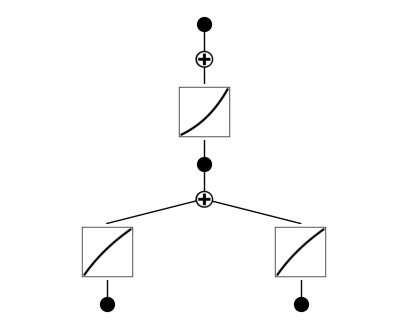

In [8]:
multivariate_kansr.train_kan(
    dataset=multivariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

2025-04-12 13:42:29,451 - LLMLEx.kanLEx - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-04-12 13:42:29,451 - LLMLEx.kanLEx - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-04-12 13:42:29,557 - llmlex.llmlex - INFO - Processing KAN model connections
2025-04-12 13:42:29,558 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,0,0)


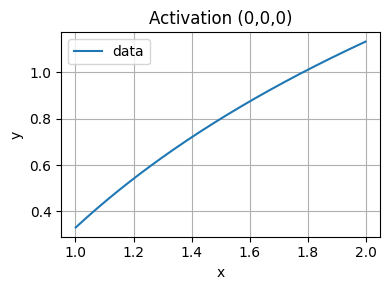

2025-04-12 13:42:29,632 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,0,0)
2025-04-12 13:42:29,634 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.3278650045394897, for constant: [0.77032725]
2025-04-12 13:42:29,634 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:42:34,024 - llmlex.llmlex - INFO - Generated 5 individuals
2025-04-12 13:42:34,025 - llmlex.llmlex - INFO - Initial population best: score=-5.0789119437899544e-11, params=[1.15790343 0.33000394], ansatz: params[0] * np.log(x) + params[1]...
2025-04-12 13:42:34,026 - llmlex.llmlex - INFO - Exit condition met after initial population
2025-04-12 13:42:34,026 - llmlex.llmlex - INFO - Successfully found expression for connection (0,0,0)



API Call Statistics:
  Successful calls (end-to-end): 5
  Failed calls: 1
  Success rate: 83.33%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 5 succeeded, 1 failed (83.33% success)

Error types:
  Fitting Errors:
    - numerical error: 1
Approximation for (0,0,0): params[0] * np.log(x) + params[1], with score -5.0789119437899544e-11 and parameters [1.158 0.33 ]


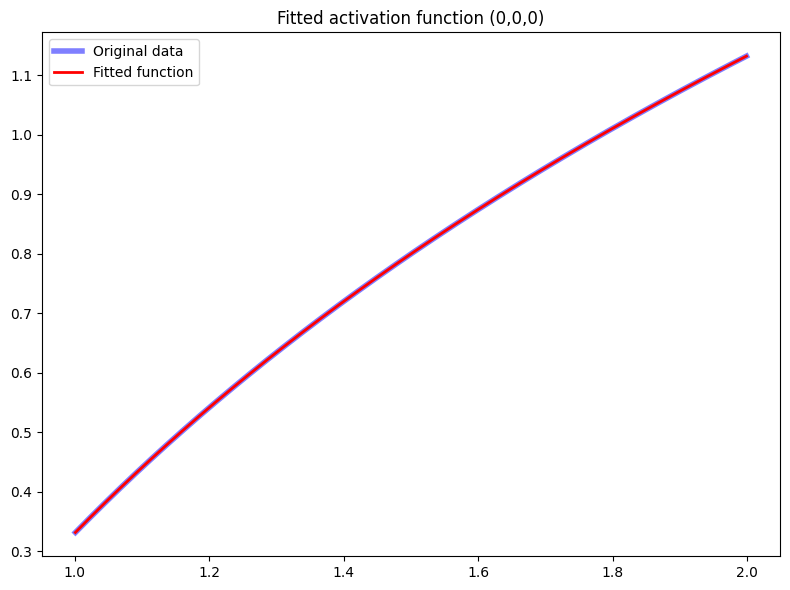

2025-04-12 13:42:34,129 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,1,0)


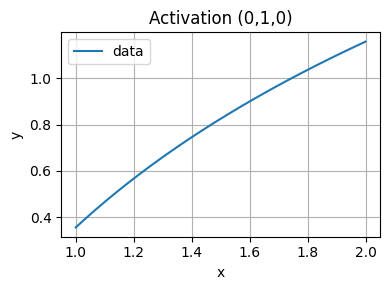

2025-04-12 13:42:34,191 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,1,0)
2025-04-12 13:42:34,192 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.3255640268325806, for constant: [0.79751974]
2025-04-12 13:42:34,193 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:42:35,569 - llmlex.llmlex - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't assist with that.'
2025-04-12 13:42:37,046 - llmlex.llmlex - INFO - Generated 5 individuals
2025-04-12 13:42:37,047 - llmlex.llmlex - INFO - Initial population best: score=-4.18999765439132e-11, params=[1.15790257 0.3557965 ], ansatz: params[0] * np.log(x) + params[1]...
2025-04-12 13:42:37,048 - llmlex.llmlex - INFO - Exit condition met after initial population
2025-04-12 13:42:37,049 - llmlex.llmlex - INFO - Successfully found expression for connection (0,1,0)



API Call Statistics:
  Successful calls (end-to-end): 5
  Failed calls: 1
  Success rate: 83.33%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 5 succeeded, 1 failed (83.33% success)
  Function Conversion: 5 succeeded, 0 failed (100.00% success)
  Curve Fitting: 5 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - llm refusal: 1
Approximation for (0,1,0): params[0] * np.log(x) + params[1], with score -4.18999765439132e-11 and parameters [1.158 0.356]


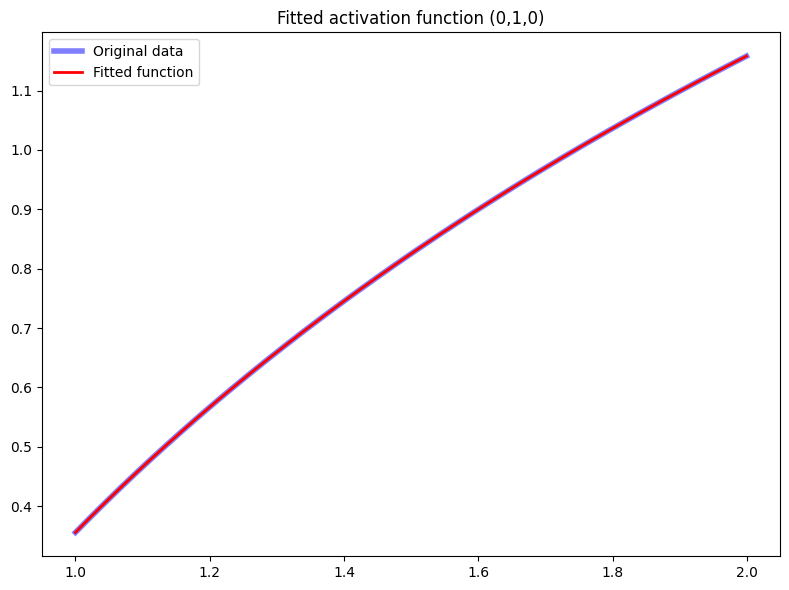

2025-04-12 13:42:37,151 - llmlex.llmlex - INFO - Processing non-symbolic activation function (1,0,0)


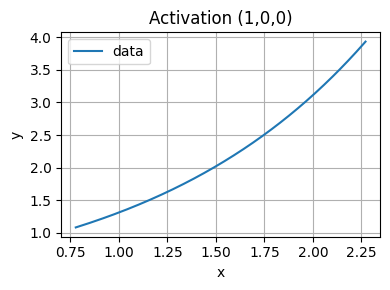

2025-04-12 13:42:37,220 - llmlex.llmlex - INFO - Running genetic algorithm for connection (1,0,0)
2025-04-12 13:42:37,222 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.9336795806884766, for constant: [2.22809194]
2025-04-12 13:42:37,222 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:42:38,365 - llmlex.llmlex - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't help with that.'
2025-04-12 13:42:40,349 - llmlex.llmlex - INFO - Generated 5 individuals
2025-04-12 13:42:40,350 - llmlex.llmlex - INFO - Initial population best: score=-2.056555759022416e-10, params=[0.55306724 0.86362891], ansatz: params[0] * np.exp(params[1] * x)...
2025-04-12 13:42:40,351 - llmlex.llmlex - INFO - Exit condition met after initial population
2025-04-12 13:42:40,351 - llmlex.llmlex - INFO - Successfully found expression for connection (1,0,0)



API Call Statistics:
  Successful calls (end-to-end): 5
  Failed calls: 1
  Success rate: 83.33%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 5 succeeded, 1 failed (83.33% success)
  Function Conversion: 5 succeeded, 0 failed (100.00% success)
  Curve Fitting: 5 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - llm refusal: 1
Approximation for (1,0,0): params[0] * np.exp(params[1] * x), with score -2.056555759022416e-10 and parameters [0.553 0.864]


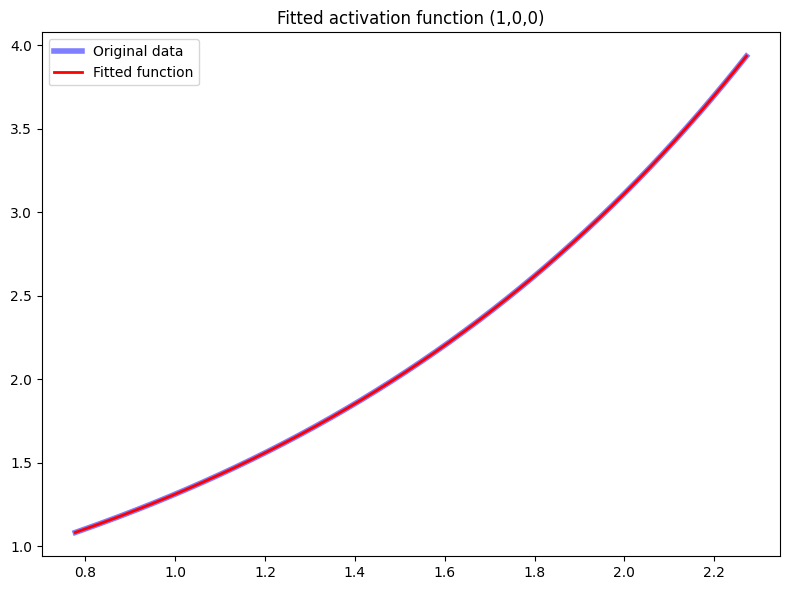

2025-04-12 13:42:40,454 - llmlex.llmlex - INFO - KAN conversion complete: 3 total connections
2025-04-12 13:42:40,455 - llmlex.llmlex - INFO - Connection breakdown: 0 symbolic, 0 zero, 3 processed
2025-04-12 13:42:40,572 - llmlex.llmlex - INFO - API key usage whilst this kan_to_symbolic was running: $0.00
2025-04-12 13:42:40,573 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 0): params[0] * np.log(x) + params[1], has parameters [1.2 0.3]
2025-04-12 13:42:40,573 - LLMLEx.kanLEx - INFO - Approximation for (0, 1, 0): params[0] * np.log(x) + params[1], has parameters [1.2 0.4]
2025-04-12 13:42:40,574 - LLMLEx.kanLEx - INFO - Approximation for (1, 0, 0): params[0] * np.exp(params[1] * x), has parameters [0.6 0.9]
2025-04-12 13:42:40,575 - LLMLEx.kanLEx - INFO - Building expression tree
2025-04-12 13:42:40,576 - LLMLEx.kanLEx - INFO - KAN Connection: (0, 0, 0), Best Expression: 1.1579034312693057 * np.log(1. * x ) + 0.3300039375139140, Score: -0.00000
2025-04-12 13:42:40,578 - LLMLEx.kanL

In [9]:
best_expressions, best_chi_squareds, results_dicts, results_all_dicts = multivariate_kansr.get_symbolic(
    client=client,
    population=5,
    generations=2,
    temperature=0.1,
    gpt_model="openai/gpt-4o",
    verbose=1,
    use_async=True,
    plot_fit=True,
    plot_parents=True,
    demonstrate_parent_plotting=True
)

In [10]:
best_expressions, best_chi_squareds

(['x0*x1'], [0.0])